In [196]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import keijzer_exogan as ke

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from glob import glob

from sklearn.metrics import r2_score
from scipy import stats

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab

# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

# load inpainting data from the inpainting notebook(s)

In [197]:
general_name = 'hhs_0_5000_1_new_*' # general filename, e.g. 'test' for test_reals.npy, test_inpainteds.npy... etc.

# get the file paths of the result files
reals = glob('gan_data//val_errors//'+general_name+'_reals.npy')
inpainteds = glob('gan_data//val_errors//'+general_name+'_inpainteds.npy')
n_iterations = glob('gan_data//val_errors//'+general_name+'_n_iterations.npy')


contextuals = glob('gan_data//val_errors//'+general_name+'_contextual_losses.npy')
perceptuals = glob('gan_data//val_errors//'+general_name+'_perceptual_losses.npy')

reals

['gan_data//val_errors/hhs_0_5000_1_new_a_reals.npy',
 'gan_data//val_errors/hhs_0_5000_1_new_b_reals.npy']

In [198]:
# load arrays to list, convert list to ndarray with shape (aspa, n_inpaintings, height, width)
reals = np.concatenate([np.load(path) for path in reals], axis=0)
inpainteds = np.concatenate([np.load(path) for path in inpainteds], axis=0)

perceptuals = np.concatenate([np.load(path) for path in perceptuals], axis=0)
contextuals = np.concatenate([np.load(path) for path in contextuals], axis=0)

In [199]:
reals.shape

(484, 1, 32, 32)

# Error of ASPA $i$

In [200]:
i = 0

decodeds =[ke.decode_params_from_aspa(inpainteds[i, j]) for j in range(reals.shape[1])]

df = pd.DataFrame.from_dict(decodeds)
df['perceptuals'] = pd.DataFrame(perceptuals)
df['contextuals'] = pd.DataFrame(contextuals)

df.describe()

,ch4_mixratio,co2_mixratio,co_mixratio,h2o_mixratio,planet_mass,planet_radius,temp_profile,perceptuals,contextuals
count,1.00000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000
mean,-7.68482,-6.367428,-6.058997,-5.518977,1.561497e+27,9.145492e+07,1003.163457,-1.011443,18492.419922
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-7.68482,-6.367428,-6.058997,-5.518977,1.561497e+27,9.145492e+07,1003.163457,-1.011443,18492.419922
25%,-7.68482,-6.367428,-6.058997,-5.518977,1.561497e+27,9.145492e+07,1003.163457,-1.011443,18492.419922
50%,-7.68482,-6.367428,-6.058997,-5.518977,1.561497e+27,9.145492e+07,1003.163457,-1.011443,18492.419922
75%,-7.68482,-6.367428,-6.058997,-5.518977,1.561497e+27,9.145492e+07,1003.163457,-1.011443,18492.419922
max,-7.68482,-6.367428,-6.058997,-5.518977,1.561497e+27,9.145492e+07,1003.163457,-1.011443,18492.419922


In [201]:
df

,ch4_mixratio,co2_mixratio,co_mixratio,h2o_mixratio,planet_mass,planet_radius,temp_profile,perceptuals,contextuals
0,-7.68482,-6.367428,-6.058997,-5.518977,1.561497e+27,9.145492e+07,1003.163457,-1.011443,18492.419922


In [202]:
if reals.shape[1] > 1 :
    params = ['planet_mass','ch4_mixratio','planet_radius','h2o_mixratio','co2_mixratio','co_mixratio']

    fontsize = 16
    plt.figure(figsize=((25,10)))
    for i,param in enumerate(params):
        plt.subplot(3,3,i+1)
        plt.title(param, fontsize=fontsize)
        plt.hist(df[param], bins=25)

        # plot mean and median line
        mu = df[param].mean()
        plt.axvline(x=mu,  color='black', linestyle='-.', alpha=0.9, label='mean')
        plt.axvline(x=df[param].median(),  color='black', linestyle='-', alpha=1, label='median')

        # plot std lines
        plt.axvline(x=mu-df[param].std(),  color='black', linestyle=':', alpha=1, label=r'$\sigma$')
        plt.axvline(x=mu+df[param].std(),  color='black', linestyle=':', alpha=1)

        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)

        plt.xlabel('Percentage error [%]', fontsize=fontsize)
        plt.ylabel('Counts [-]', fontsize=fontsize)

        plt.legend(fontsize=fontsize)
        plt.grid()
        plt.tight_layout()

In [203]:
#reals = reals.mean(axis=1) # take the mean of n_inpaintings per aspa, new shape is (aspa, height, width)
#inpainteds = inpainteds.mean(axis=1)

#reals = reals.reshape(reals.shape[0]*reals.shape[1], 32,32)
#inpainteds = inpainteds.reshape(inpainteds.shape[0]*inpainteds.shape[1], 32,32)

#from scipy import stats
#df = df[(np.abs(stats.zscore(df)) < 1).all(axis=1)]

reals.shape

(484, 1, 32, 32)

# Error all ASPAs

In [204]:
reals[0].shape

(1, 32, 32)

/home/16011015/notebooks/SRON-DCGAN/notebooks/keijzer_exogan.py:370: RuntimeWarning: Mean of empty slice.
  mins_ = [aspa[16:17, i*2:i*2+2].mean() for i in range(n_bins)]
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/16011015/notebooks/SRON-DCGAN/notebooks/keijzer_exogan.py:371: RuntimeWarning: Mean of empty slice.
  maxs_ = [aspa[17:18, i*2:i*2+2].mean() for i in range(n_bins)]
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


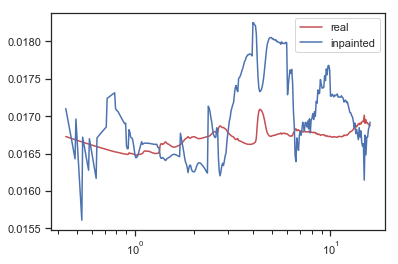

In [205]:
i = 0

xhat,yhat = ke.decode_spectrum_from_aspa(reals[i][0])
x,y  = ke.decode_spectrum_from_aspa(inpainteds[i][0])

plt.plot(xhat, yhat, label='real', c='r')
plt.plot(x,y,label='inpainted')

plt.gca().set_xscale('log')

plt.legend()

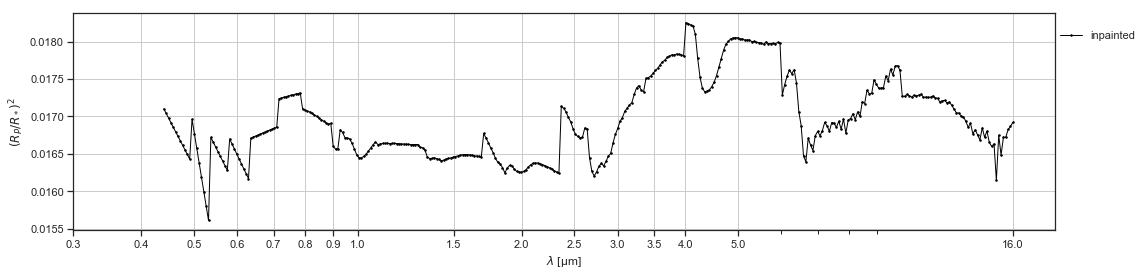

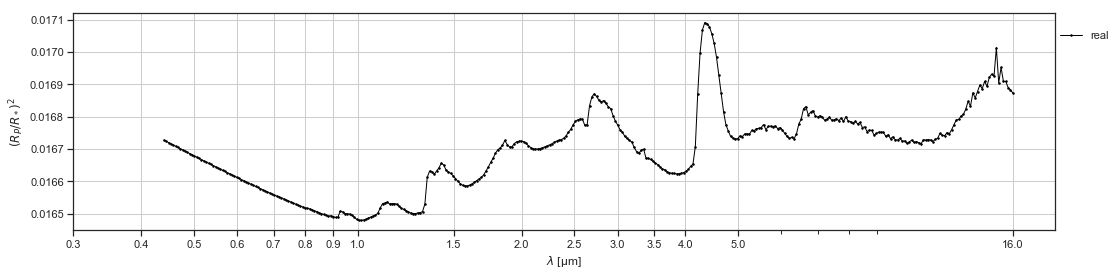

In [206]:
ke.plot_trans(x,y, label='inpainted')
ke.plot_trans(xhat,yhat, label='real')

In [207]:
reals.shape

(484, 1, 32, 32)

In [208]:
reals = [ke.decode_params_from_aspa(real[0]) for real in reals]
inpainteds = [ke.decode_params_from_aspa(inpainted[0]) for inpainted in inpainteds]

In [209]:
# create dfs for real, inpainted and their percentage errors

reals = pd.DataFrame.from_dict(reals)
inpainteds = pd.DataFrame.from_dict(inpainteds)
errors = (inpainteds - reals) / reals * 100



In [210]:
contextuals.shape

(484,)

In [211]:
errors = errors.replace([np.inf, -np.inf], np.nan) # TODO: Fix the occurance of inf, this has to do with 0 Kelvin values

reals.columns = [column+'_real' for column in reals.columns]
inpainteds.columns = [column+'_inpainted' for column in inpainteds.columns]
errors.columns = [column+'_error' for column in errors.columns]

In [212]:
errors.describe()

,ch4_mixratio_error,co2_mixratio_error,co_mixratio_error,h2o_mixratio_error,planet_mass_error,planet_radius_error,temp_profile_error
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,-6.662251,-8.401523,5.985864,-1.287969,3.017727,0.323843,5.399980
std,25.827486,25.426941,73.611780,29.996613,40.573191,2.113005,32.353726
min,-81.880994,-81.397091,-104.872143,-74.061758,-70.175588,-11.089834,-52.950484
25%,-10.405652,-11.065595,-25.091888,-8.201987,-24.216495,-0.857874,-18.891538
50%,-2.091647,-2.588314,-3.097985,-2.669463,-4.784057,0.349500,1.998071
75%,1.198960,1.211275,17.931525,1.565250,19.722230,1.585697,23.615572
max,151.402164,288.344030,826.733541,299.204286,144.408444,8.595897,102.282023


In [213]:
errors[:10]

,ch4_mixratio_error,co2_mixratio_error,co_mixratio_error,h2o_mixratio_error,planet_mass_error,planet_radius_error,temp_profile_error
0,-3.939755,-1.195078,-5.981079,-2.606297,-11.852866,3.275953,0.316346
1,-5.412561,-17.719996,-11.623597,35.366960,-16.402678,-6.936873,2.560011
2,6.985370,8.447228,66.336531,52.948243,-8.761689,2.656116,26.652350
3,16.384058,-1.826976,5.749626,-5.475660,4.542902,1.496161,-5.510997
4,-12.110427,-36.825115,11.069930,-17.367516,-23.348090,0.132612,-36.284583
5,4.237038,-3.223216,7.857805,-11.403460,-15.585602,1.204581,-22.486152
6,6.052747,-0.460242,-8.509277,-0.810822,-8.634961,-0.374672,-21.062178
7,-14.032496,-33.244946,0.049160,49.539942,-20.178454,0.064340,-13.848474
8,1.281926,4.423071,52.429813,0.104824,-15.561173,-3.159082,30.225914
9,94.628501,18.542105,-10.413195,-9.024455,99.534704,2.488334,18.200771


In [214]:
errors[errors.planet_radius_error < -50]

,ch4_mixratio_error,co2_mixratio_error,co_mixratio_error,h2o_mixratio_error,planet_mass_error,planet_radius_error,temp_profile_error


In [215]:
### join the dfs together
df = reals.join(inpainteds, how='outer')
df = df.join(errors, how='outer')

df['perceptuals'] = pd.DataFrame(perceptuals)
df['contextuals'] = pd.DataFrame(contextuals)

In [216]:
df.describe()

,ch4_mixratio_real,co2_mixratio_real,co_mixratio_real,h2o_mixratio_real,planet_mass_real,planet_radius_real,temp_profile_real,ch4_mixratio_inpainted,co2_mixratio_inpainted,co_mixratio_inpainted,...,temp_profile_inpainted,ch4_mixratio_error,co2_mixratio_error,co_mixratio_error,h2o_mixratio_error,planet_mass_error,planet_radius_error,temp_profile_error,perceptuals,contextuals
count,484.000000,484.000000,484.000000,484.000000,4.840000e+02,4.840000e+02,484.000000,484.000000,484.000000,484.000000,...,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,-4.323232,-4.471074,-4.614096,-4.352158,2.642037e+27,8.053246e+07,1538.337926,-4.073945,-4.191129,-4.324870,...,1548.025722,-6.662251,-8.401523,5.985864,-1.287969,3.017727,0.323843,5.399980,-0.674074,19176.773438
std,2.249988,2.293632,2.238990,2.240368,7.499097e+26,1.562192e+07,326.373872,2.432457,2.509447,2.287180,...,334.049581,25.827486,25.426941,73.611780,29.996613,40.573191,2.113005,32.353726,0.362396,15759.196289
min,-8.000000,-8.000000,-8.000000,-8.000000,1.518400e+27,5.592880e+07,1000.000000,-8.342005,-8.452016,-9.696943,...,813.515723,-81.880994,-81.397091,-104.872143,-74.061758,-70.175588,-11.089834,-52.950484,-1.836102,7812.499023
25%,-6.444445,-6.444445,-6.444445,-6.444445,2.024533e+27,6.680384e+07,1222.222209,-6.448691,-6.520158,-6.279696,...,1250.435315,-10.405652,-11.065595,-25.091888,-8.201987,-24.216495,-0.857874,-18.891538,-0.910703,11623.184082
50%,-4.111111,-4.888889,-4.888889,-4.111111,2.530667e+27,7.767889e+07,1555.555556,-4.024039,-4.288691,-4.181375,...,1614.515260,-2.091647,-2.588314,-3.097985,-2.669463,-4.784057,0.349500,1.998071,-0.717861,13807.482910
75%,-1.777778,-2.555555,-2.555555,-2.555555,3.289867e+27,9.399146e+07,1777.777791,-1.741093,-1.671448,-2.250394,...,1827.805951,1.198960,1.211275,17.931525,1.565250,19.722230,1.585697,23.615572,-0.439723,19151.437988
max,-1.000000,-1.000000,-1.000000,-1.000000,3.796000e+27,1.048665e+08,2000.000000,-0.858856,-0.738922,0.048721,...,2173.425913,151.402164,288.344030,826.733541,299.204286,144.408444,8.595897,102.282023,-0.001752,129889.156250


In [217]:
df[:10]

,ch4_mixratio_real,co2_mixratio_real,co_mixratio_real,h2o_mixratio_real,planet_mass_real,planet_radius_real,temp_profile_real,ch4_mixratio_inpainted,co2_mixratio_inpainted,co_mixratio_inpainted,...,temp_profile_inpainted,ch4_mixratio_error,co2_mixratio_error,co_mixratio_error,h2o_mixratio_error,planet_mass_error,planet_radius_error,temp_profile_error,perceptuals,contextuals
0,-8.000000,-6.444445,-6.444445,-5.666667,1.771467e+27,8.855393e+07,1000.000000,-7.684820,-6.367428,-6.058997,...,1003.163457,-3.939755,-1.195078,-5.981079,-2.606297,-11.852866,3.275953,0.316346,-1.011443,18492.419922
1,-4.111111,-5.666667,-1.000000,-4.111111,3.036800e+27,6.136632e+07,2000.000000,-3.888595,-4.662534,-0.883764,...,2051.200211,-5.412561,-17.719996,-11.623597,35.366960,-16.402678,-6.936873,2.560011,-0.376739,60622.789062
2,-2.555555,-2.555555,-4.888889,-4.888889,1.771467e+27,9.942898e+07,1666.666672,-2.734070,-2.771429,-8.132008,...,2110.872507,6.985370,8.447228,66.336531,52.948243,-8.761689,2.656116,26.652350,-0.528502,17262.767578
3,-6.444445,-6.444445,-8.000000,-2.555555,1.518400e+27,8.855393e+07,1777.777791,-7.500306,-6.326706,-8.459970,...,1679.804504,16.384058,-1.826976,5.749626,-5.475660,4.542902,1.496161,-5.510997,-0.519701,11728.823242
4,-4.111111,-1.777778,-1.000000,-2.555555,3.542933e+27,7.224137e+07,1777.777791,-3.613238,-1.123109,-1.110699,...,1132.718533,-12.110427,-36.825115,11.069930,-17.367516,-23.348090,0.132612,-36.284583,-0.217234,18424.664062
5,-1.000000,-7.222222,-4.111111,-8.000000,3.542933e+27,6.680384e+07,1555.555556,-1.042370,-6.989434,-4.434154,...,1205.770969,4.237038,-3.223216,7.857805,-11.403460,-15.585602,1.204581,-22.486152,-0.915310,10048.786133
6,-7.222222,-4.111111,-7.222222,-3.333333,1.518400e+27,8.855393e+07,1222.222209,-7.659365,-4.092190,-6.607663,...,964.795589,6.052747,-0.460242,-8.509277,-0.810822,-8.634961,-0.374672,-21.062178,-1.190346,13122.264648
7,-4.888889,-2.555555,-8.000000,-4.888889,2.277600e+27,8.855393e+07,1888.888896,-4.202856,-1.705962,-8.003933,...,1627.306610,-14.032496,-33.244946,0.049160,49.539942,-20.178454,0.064340,-13.848474,-0.245345,58727.722656
8,-1.000000,-8.000000,-3.333333,-4.111111,3.036800e+27,7.767889e+07,1111.111104,-1.012819,-8.353846,-5.080994,...,1446.954593,1.281926,4.423071,52.429813,0.104824,-15.561173,-3.159082,30.225914,-0.924204,10027.079102
9,-1.000000,-4.111111,-6.444445,-8.000000,1.771467e+27,7.767889e+07,1555.555556,-1.946285,-4.873398,-5.773372,...,1838.678658,94.628501,18.542105,-10.413195,-9.024455,99.534704,2.488334,18.200771,-0.508757,9377.462891


In [218]:
#df = df.drop(['temp_profile_error','temp_profile_real','temp_profile_inpainted'], axis=1)

# Percentage error histograms per retrieved parameter

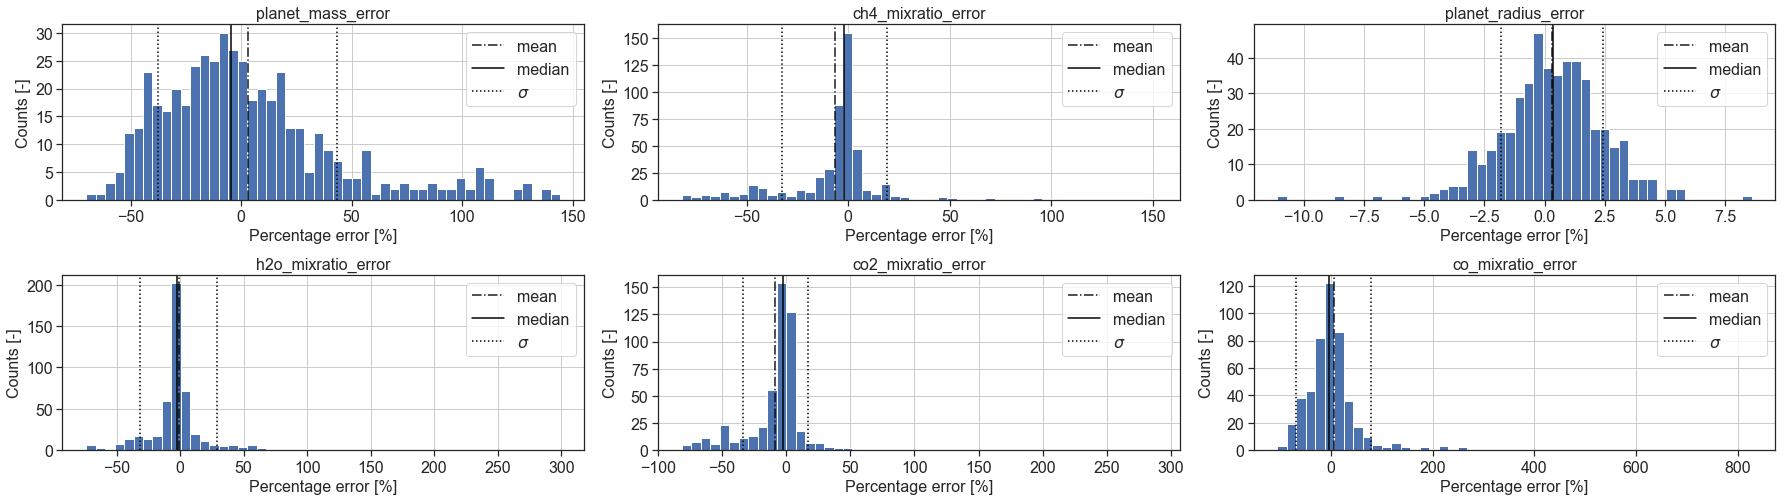

In [219]:
#params = ['planet_mass','temp_profile','ch4_mixratio','planet_radius','h2o_mixratio','co2_mixratio','co_mixratio']
params = ['planet_mass','ch4_mixratio','planet_radius','h2o_mixratio','co2_mixratio','co_mixratio']

fontsize = 16
plt.figure(figsize=((25,10)))
for i,param in enumerate(params):
    plt.subplot(3,3,i+1)
    plt.title(param+'_error', fontsize=fontsize)
    plt.hist(df[param+'_error'], bins=50)
    
    # plot mean and median line
    mu = df[param+'_error'].mean()
    plt.axvline(x=mu,  color='black', linestyle='-.', alpha=0.9, label='mean')
    plt.axvline(x=df[param+'_error'].median(),  color='black', linestyle='-', alpha=1, label='median')

    # plot std lines
    plt.axvline(x=mu-df[param+'_error'].std(),  color='black', linestyle=':', alpha=1, label=r'$\sigma$')
    plt.axvline(x=mu+df[param+'_error'].std(),  color='black', linestyle=':', alpha=1)
    
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    
    plt.xlabel('Percentage error [%]', fontsize=fontsize)
    plt.ylabel('Counts [-]', fontsize=fontsize)
    
    plt.legend(fontsize=fontsize)
    plt.grid()
    plt.tight_layout()

# Grab the $n$ sigma errors

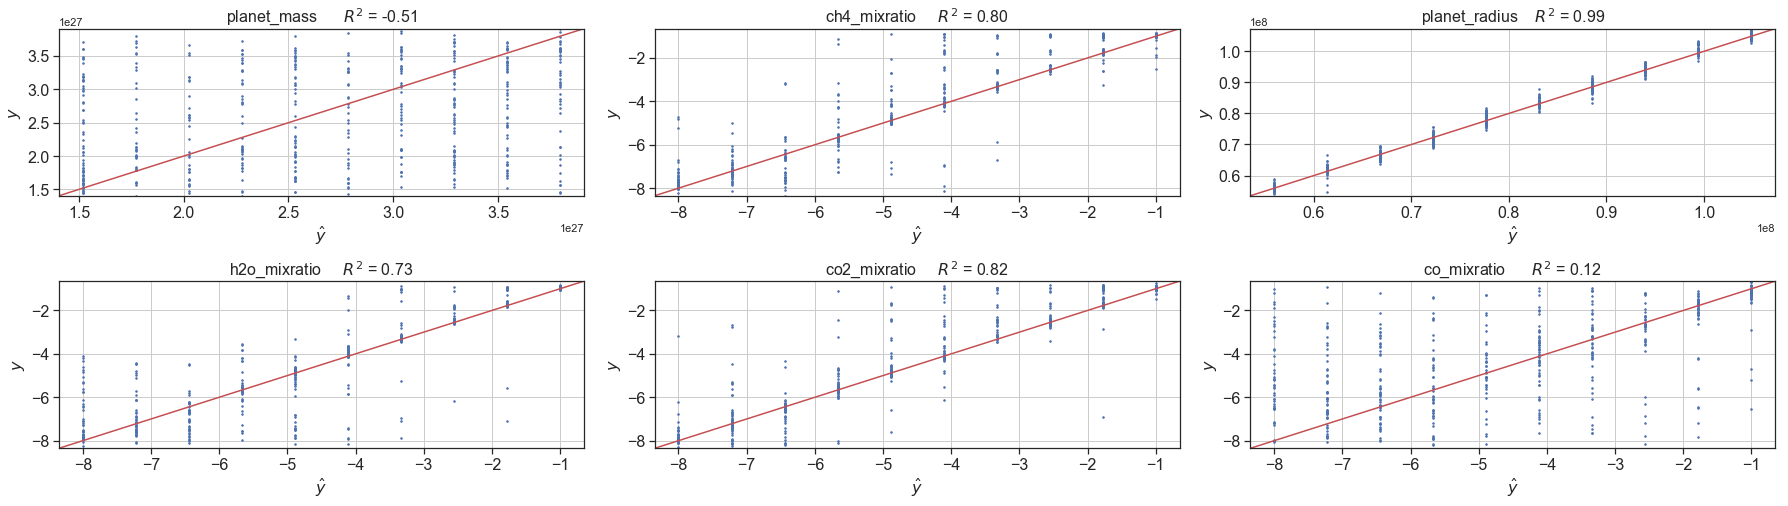

In [220]:
plt.figure(figsize=((25,10)))

for i,param in enumerate(params):
    y_hat = df[param+'_real']
    y = df[param+'_inpainted']
    
    r2 = r2_score(y_hat, y)
    
    plt.subplot(3,3,i+1)

    plt.title(param +' \t $R^2$ = %.2f' % r2, fontsize=fontsize)
    plt.plot(y_hat, y, '.', ms=3)
    
    """Force x,y range on the same scale outliers outside of range wont be plotted!"""
    x_min, x_max = plt.xlim()
    x_min = x_min*1
    x_max = x_max*1
    
    plt.ylim((x_min, x_max)) # set y axis range the same as x axis range
    plt.xlim((x_min, x_max))
    
    # Plot the red 'perfect' prediction line
    plt.plot(plt.xlim(), plt.ylim(), ls="-", c='r')
    
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    
    plt.xlabel(r"$\hat{y}$", fontsize=fontsize)
    plt.ylabel(r"$y$", fontsize=fontsize)
    plt.grid()
    plt.tight_layout()

# 1$\sigma$ percentage error per parameter

### Unique values STD plot
y axis, STD  
X axis, unique values  

This plot shows the STD per parameter value (10 values for ExoGAN data)

Horizontal -. line is the 10% line

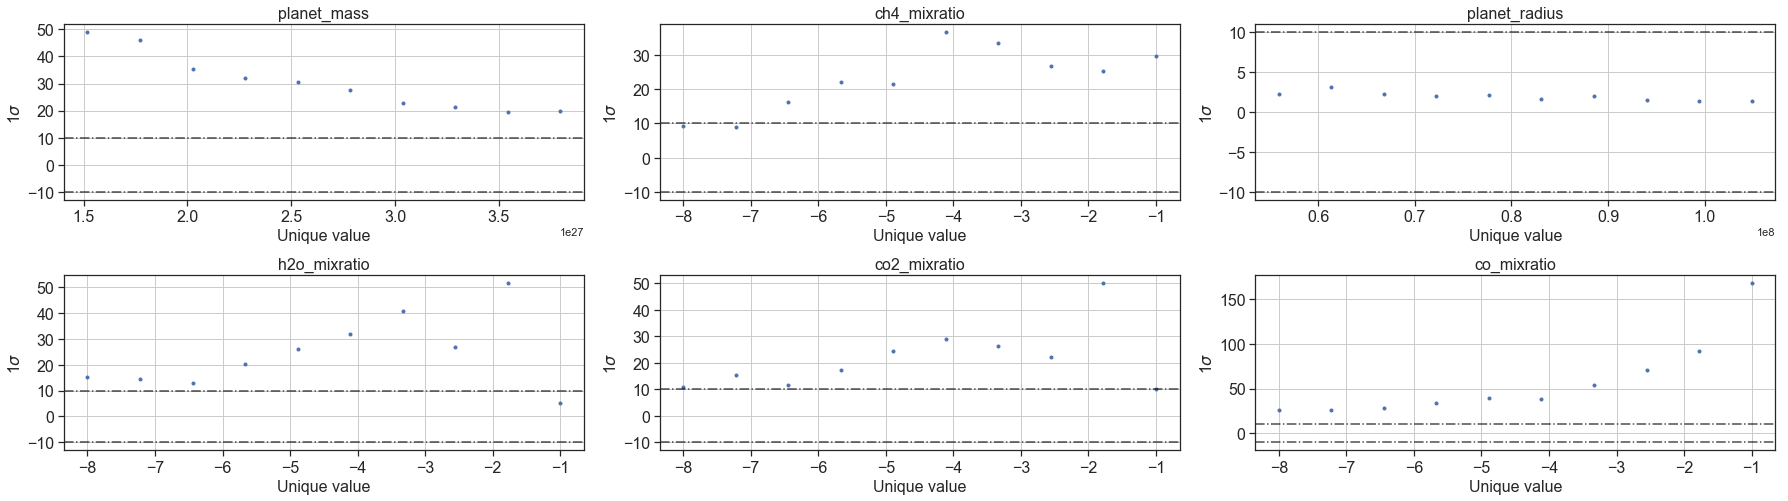

In [221]:
plt.figure(figsize=((25,10)))

for i,param in enumerate(params):
    uniques = df[param+'_real'].unique()
    
    counts = []
    stds = []
    for unique in uniques:
        t = df[param+'_error'][(df[param+'_real'] == unique)]
        std = t.std()
        count = t.count()
        #print(count, std)

        counts.append(count)
        stds.append(std)

    plt.subplot(3,3,i+1)
    plt.plot(uniques, stds, '.')
    
    plt.axhline(y=10,  color='black', linestyle='-.', alpha=0.7, label='10%')
    plt.axhline(y=-10,  color='black', linestyle='-.', alpha=0.7)
    
    """layout"""""
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    
    plt.grid()
    plt.title(param, fontsize=fontsize)
    plt.xlabel('Unique value', fontsize=fontsize)
    plt.ylabel(r'1$\sigma$', fontsize=fontsize)
    plt.tight_layout()
    

In [222]:
iters = [np.load(iters) for iters in n_iterations]
iters

[array([], dtype=float64), array([], dtype=float64)]

In [223]:
uniques

array([-6.44444454, -1.        , -4.88888889, -8.        , -4.11111111,
       -7.22222227, -3.3333333 , -2.55555546, -5.6666667 , -1.77777773])

# Losses

In [224]:
df[['perceptuals', 'contextuals']].describe()

,perceptuals,contextuals
count,484.000000,484.000000
mean,-0.674074,19176.773438
std,0.362396,15759.196289
min,-1.836102,7812.499023
25%,-0.910703,11623.184082
50%,-0.717861,13807.482910
75%,-0.439723,19151.437988
max,-0.001752,129889.156250


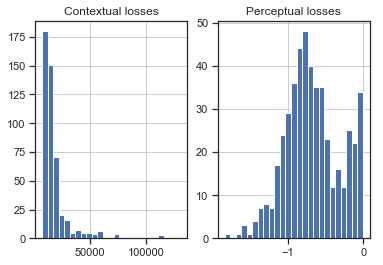

In [225]:
plt.subplot(1,2,1)
plt.hist(df.contextuals, bins=25)
plt.title('Contextual losses')
plt.grid()

plt.subplot(1,2,2)
plt.hist(df.perceptuals, bins=25)
plt.title('Perceptual losses')
plt.grid()

# Param percentage errors vs contextual loss
For contextual loss, lower is better.

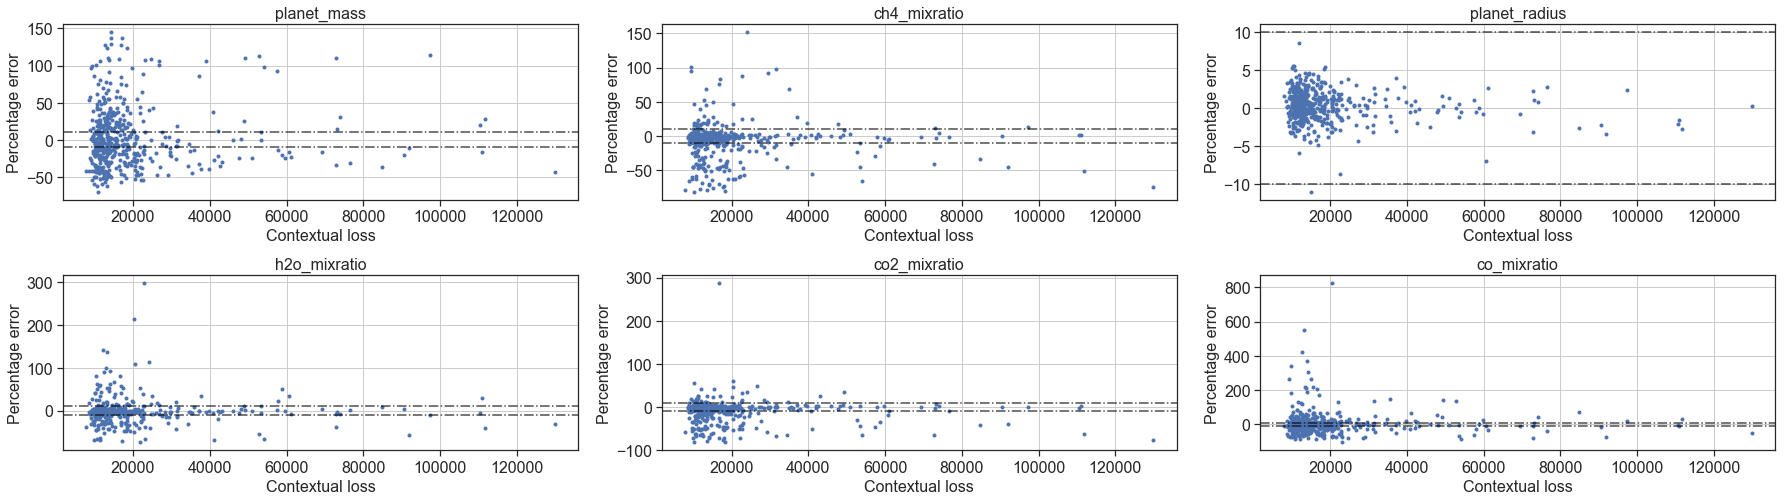

In [226]:
plt.figure(figsize=((25,10)))

for i,param in enumerate(params):
    plt.subplot(3,3,i+1)
    plt.plot(df.contextuals, df[param+'_error'], '.')
    
    plt.axhline(y=10,  color='black', linestyle='-.', alpha=0.7, label='10%')
    plt.axhline(y=-10,  color='black', linestyle='-.', alpha=0.7)
    
    """layout"""""
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    
    #plt.ylim((-100,100))
    
    plt.grid()
    plt.title(param, fontsize=fontsize)
    plt.xlabel('Contextual loss', fontsize=fontsize)
    plt.ylabel(r'Percentage error', fontsize=fontsize)
    #plt.legend()
    plt.tight_layout()
    

# Param percentage errors vs perceptual loss
For perceptual loss, lower is better.

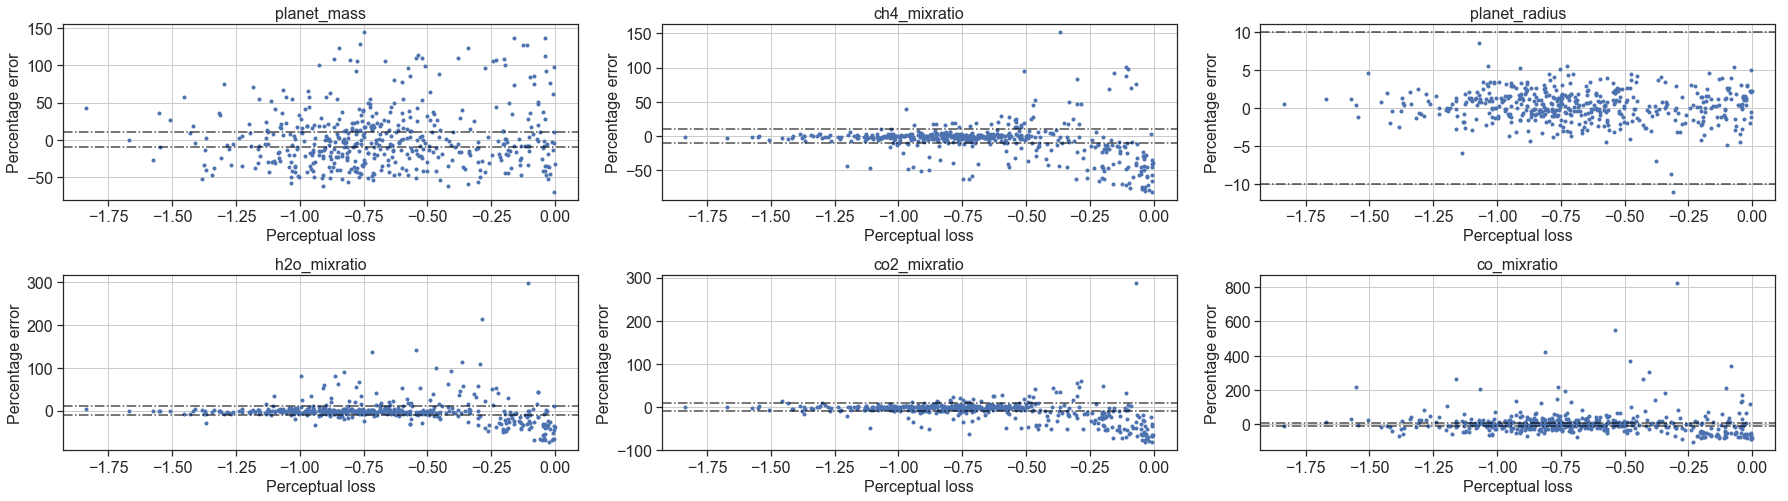

In [227]:
plt.figure(figsize=((25,10)))

for i,param in enumerate(params):
    plt.subplot(3,3,i+1)
    plt.plot(df.perceptuals, df[param+'_error'], '.')
    
    plt.axhline(y=10,  color='black', linestyle='-.', alpha=0.7, label='10%')
    plt.axhline(y=-10,  color='black', linestyle='-.', alpha=0.7)
    
    """layout"""""
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    
    plt.grid()
    plt.title(param, fontsize=fontsize)
    plt.xlabel('Perceptual loss', fontsize=fontsize)
    plt.ylabel(r'Percentage error', fontsize=fontsize)
    plt.tight_layout()